<a href="https://colab.research.google.com/github/PRAFULPAWAR8888/AI-ML-Projects2025/blob/main/DL/object_Recognition_Using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing The Dependencies**

# **DL Project- CIFAR-10 OBJECT RECOGINATION USING RESNET50**

In [116]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [62]:
#import py7zr

#dataset = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL5-Object Recognition using ResNet50/cifar-10/train.7z"
#extract_path = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL5-Object Recognition using ResNet50/cifar-10"

#with py7zr.SevenZipFile(dataset, mode='r') as archive:
 #   archive.extractall(path=extract_path)

#print("Dataset extracted successfully!")


In [63]:
import kagglehub
path = kagglehub.dataset_download("petitbonney/cifar10-image-recognition")

Using Colab cache for faster access to the 'cifar10-image-recognition' dataset.


In [64]:
print(path)

/kaggle/input/cifar10-image-recognition


In [65]:
path = "/root/.cache/kagglehub/datasets/petitbonney/cifar10-image-recognition/versions/1/"
import os

files = os.listdir(path)
print(files)


['sampleSubmission.csv', 'train.npy', 'test.npy', 'trainLabels.csv']


In [66]:
X_train = np.load(path + "/train.npy")

In [67]:
type(X_train)

numpy.ndarray

In [68]:
len(X_train)

32

In [69]:
print(X_train[0:5])
print(X_train[-5:])

[[[ 63  62  59]
  [ 45  46  43]
  [ 43  48  50]
  [ 42  54  68]
  [ 52  73  98]
  [ 63  91 119]
  [ 75 107 139]
  [ 80 110 145]
  [ 89 117 149]
  [ 93 120 149]
  [ 77 103 131]
  [ 76  99 125]
  [ 91 115 142]
  [ 86 112 144]
  [ 79 105 137]
  [ 71  97 129]
  [ 79 106 137]
  [ 76 106 134]
  [ 64  97 124]
  [ 78 113 139]
  [ 75 112 139]
  [ 69 105 133]
  [ 74 105 136]
  [ 77 108 139]
  [ 89 120 152]
  [100 131 163]
  [108 136 168]
  [102 129 159]
  [104 130 158]
  [108 132 158]
  [102 125 152]
  [103 124 148]]

 [[ 20  20  16]
  [  0   0   0]
  [  0   8  18]
  [  8  27  51]
  [ 21  51  88]
  [ 43  82 120]
  [ 45  89 128]
  [ 44  86 127]
  [ 50  87 126]
  [ 44  79 116]
  [ 37  70 106]
  [ 35  67 101]
  [ 36  70 105]
  [ 35  74 113]
  [ 33  70 109]
  [ 37  72 112]
  [ 44  79 119]
  [ 33  71 109]
  [ 27  69 105]
  [ 46  89 125]
  [ 46  92 127]
  [ 39  85 122]
  [ 47  89 131]
  [ 41  82 124]
  [ 37  79 121]
  [ 48  89 131]
  [ 53  91 132]
  [ 58  94 133]
  [ 60  96 133]
  [ 55  88 123]
  [ 50

# **Labels Processing**

In [70]:
labels_df = pd.read_csv(path + "/trainLabels.csv")

In [71]:
labels_df.info

<bound method DataFrame.info of           id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]>

In [72]:
labels_df.shape


(50000, 2)

In [73]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [74]:
labels_df[labels_df["id"] == 4]

,id,label
3,4,deer


In [75]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [76]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [77]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [78]:
labels_dictionary = {"airplane":0, "automobile":1, "bird":2, "cat":3, "deer":4, "dog":5, "frog":6, "horse":7, "ship":8, "truck":9} #label encoding

labels = [labels_dictionary[i] for i in labels_df['label']]

In [79]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


(np.float64(-0.5), np.float64(2.5), np.float64(31.5), np.float64(-0.5))

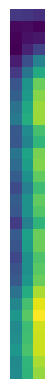

In [80]:
import numpy as np
import matplotlib.pyplot as plt

path = "/root/.cache/kagglehub/datasets/petitbonney/cifar10-image-recognition/versions/1/"

X_train = np.load(path + "/train.npy")

plt.imshow(X_train[0])
plt.axis("off")


In [81]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [82]:
id_list = list(labels_df["id"])

In [83]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# **Image Processing**

In [84]:
import numpy as np

train_npy_path = "/root/.cache/kagglehub/datasets/petitbonney/cifar10-image-recognition/versions/1/train.npy"

X_train = np.load(train_npy_path)

data = []
for idx in range(len(X_train)):
    data.append(X_train[idx])

data = np.array(data)


In [85]:

len(data)



32

In [86]:
type(data)

numpy.ndarray

In [87]:
data[0].shape



(32, 3)

In [88]:
X = np.array(data)
Y = np.array(labels)

In [89]:
type(X)
type(Y)

numpy.ndarray

In [90]:
print(X.shape)
print(Y.shape)

(32, 32, 3)
(50000,)


**Train Test Split**

The `train.npy` file you were using seems to contain only a single image. For the full CIFAR-10 dataset with 50,000 training images, we will load it using `tensorflow.keras.datasets`.

In [91]:
import tensorflow as tf

# Load the CIFAR-10 dataset directly from Keras
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

print(f"Shape of full training images (X_train_full): {X_train_full.shape}")
print(f"Shape of full training labels (y_train_full): {y_train_full.shape}")

# Flatten the labels to be a 1D array
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

# Assign to X and Y for consistency with previous steps
X = X_train_full
Y = y_train_full

print(f"Updated shape of X: {X.shape}")
print(f"Updated shape of Y: {Y.shape}")

Shape of full training images (X_train_full): (50000, 32, 32, 3)
Shape of full training labels (y_train_full): (50000, 1)
Updated shape of X: (50000, 32, 32, 3)
Updated shape of Y: (50000,)


Now that we have correctly loaded the full dataset, we can proceed with the train-test split.

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (40000, 32, 32, 3)
Shape of y_train: (40000,)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000,)


# **Data Preprocessing: Normalization**

In [93]:
X.shape

(50000, 32, 32, 3)

In [94]:
Y.shape

(50000,)

In [95]:
type(X)

numpy.ndarray

In [96]:
type(Y)

numpy.ndarray

In [97]:
unique_labels, counts = np.unique(Y, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count} occurrences")

Label 0: 5000 occurrences
Label 1: 5000 occurrences
Label 2: 5000 occurrences
Label 3: 5000 occurrences
Label 4: 5000 occurrences
Label 5: 5000 occurrences
Label 6: 5000 occurrences
Label 7: 5000 occurrences
Label 8: 5000 occurrences
Label 9: 5000 occurrences


In [98]:
print(labels_dictionary)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [99]:
type(X)
X.shape

(50000, 32, 32, 3)

In [100]:
type(Y)
Y.shape

(50000,)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [102]:
print(X.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [103]:
# scalling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [104]:
x_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

array([[[34, 36, 43],
        [37, 37, 51],
        [44, 44, 64],
        ...,
        [62, 73, 93],
        [52, 63, 83],
        [45, 57, 77]],

       [[35, 35, 37],
        [34, 34, 40],
        [34, 33, 43],
        ...,
        [58, 69, 89],
        [50, 60, 80],
        [47, 58, 78]],

       [[34, 33, 35],
        [33, 32, 36],
        [33, 32, 38],
        ...,
        [66, 77, 97],
        [51, 62, 82],
        [53, 64, 84]],

       ...,

       [[32, 32, 38],
        [32, 31, 37],
        [33, 33, 38],
        ...,
        [41, 38, 45],
        [34, 31, 38],
        [36, 32, 40]],

       [[33, 31, 36],
        [32, 30, 36],
        [34, 32, 37],
        ...,
        [37, 35, 40],
        [32, 29, 35],
        [30, 28, 33]],

       [[37, 32, 35],
        [37, 32, 36],
        [37, 33, 36],
        ...,
        [49, 47, 49],
        [47, 45, 48],
        [58, 56, 58]]], dtype=uint8)
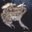

In [105]:
x_train[0]

**Building the Neural Network**

In [106]:
import tensorflow as tf
from tensorflow import keras

In [107]:
num_of_classes = 10

# settting up the layers of Neural Networks
model = keras.Sequential([
    keras.Input(shape=(32,32,3)), # Explicitly define input shape
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [108]:
from numpy.matrixlib.defmatrix import matrix
# compile the neural network
model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics =['acc'])

In [109]:
# training the neural network model
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.2405 - loss: 2.0631 - val_acc: 0.3092 - val_loss: 1.8996
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.3187 - loss: 1.8697 - val_acc: 0.3160 - val_loss: 1.8501
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3387 - loss: 1.8315 - val_acc: 0.3520 - val_loss: 1.8156
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3514 - loss: 1.8094 - val_acc: 0.3692 - val_loss: 1.7984
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - acc: 0.3614 - loss: 1.7777 - val_acc: 0.3560 - val_loss: 1.7976
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3673 - loss: 1.7799 - val_acc: 0.3415 - val_loss: 1.8052
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3667 - loss: 1.7728 - val_acc: 0.3503 - val_loss: 1.7972
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3689 - loss: 1.7650 - val_acc: 0.3428 - val_loss: 1.8292
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━

**Transfer_Learning technique used for improve model accuracy ResNet50 model**

In [110]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from  tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [111]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [112]:
model = models.Sequential()
model.add(layers.UpSampling2D(size=(2,2)))
model.add(layers.UpSampling2D(size=(2,2)))
model.add(layers.UpSampling2D(size=(2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [114]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'],
)


In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()
